# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

In [38]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("datasets\MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


In [101]:
'''
nota geral: 0-98 
i08: Qual a renda total de sua família, incluindo seus rendimentos?
i05 escolaridade da mae
'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_GRUPO', 'QE_I08', 'CO_IES', 'QE_I05'])
tabela.head(10)

,NT_GER,CO_GRUPO,QE_I08,CO_IES,QE_I05
0,"52,6",5710,B,1,F
1,"63,1",5710,B,1,D
2,"33,7",5710,F,1,F
3,"58,1",5710,B,1,D
4,"46,3",5710,F,1,F
5,"64,2",5710,C,1,B
6,"41,4",5710,C,1,D
7,"48,8",5710,C,1,E
8,"52,9",5710,E,1,F
9,"62,7",5710,C,1,D


In [102]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
tabela=tabela.loc[(tabela['NT_GER'].notnull())]


tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
tabela.head()

,NT_GER,CO_GRUPO,QE_I08,CO_IES,QE_I05
0,52.6,5710,B,1,F
1,63.1,5710,B,1,D
2,33.7,5710,F,1,F
3,58.1,5710,B,1,D
4,46.3,5710,F,1,F


In [103]:
tabela=tabela.loc[(tabela['QE_I08'].notnull())]
tabela=tabela.loc[(tabela['QE_I05'].notnull())]

tabela['QE_I08'] = tabela['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6,'G':7})
tabela['QE_I05'] = tabela['QE_I05'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
tabela.head()

,NT_GER,CO_GRUPO,QE_I08,CO_IES,QE_I05
0,52.6,5710,2,1,6
1,63.1,5710,2,1,4
2,33.7,5710,6,1,6
3,58.1,5710,2,1,4
4,46.3,5710,6,1,6


In [123]:
X_train

,QE_I08,QE_I05
57926,3,5
224539,4,6
8527,2,4
267737,1,4
427175,2,4
281080,1,2
40705,2,3
455887,3,4
414940,2,2
407092,2,4


In [120]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix  

clf = MLPClassifier(alpha=0.01,max_iter=2000)

#ccomp = tabela[tabela['CO_GRUPO']==4004]

X = pandas.DataFrame(tabela, columns=['QE_I08', 'QE_I05'])

#percentil que a valor pertence
y = pandas.qcut(tabela.NT_GER, 4, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

clf.fit(X_train, y_train)  
yp=clf.predict(X_test)

print(confusion_matrix(y_test,yp))  
print(classification_report(y_test,yp))



[[12474  3615  4053  7592]
 [10356  3485  4264  9614]
 [ 8722  3331  4240 11332]
 [ 6583  2857  4054 14145]]
             precision    recall  f1-score   support

          0       0.33      0.45      0.38     27734
          1       0.26      0.13      0.17     27719
          2       0.26      0.15      0.19     27625
          3       0.33      0.51      0.40     27639

avg / total       0.29      0.31      0.29    110717



In [121]:
#verificar se alguma classe não foi predita
set(y_test) - set(yp)

set()

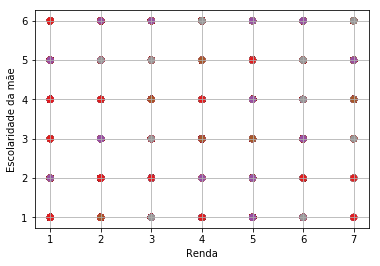

In [128]:
plt.subplots()
plt.scatter(X_train.QE_I08, X_train.QE_I05, c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Renda')
plt.ylabel('Escolaridade da mãe')
plt.grid(True)
plt.show()

**Links utilizados:**

http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/mec-e-inep-divulgam-resultados-do-enade-2017-e-indicadores-de-qualidade-da-educacao-superior/21206

http://portal.inep.gov.br/web/guest/microdados

https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93